# Wine Quality Classification Using Decision Tree and Naive Bayes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data files
red_wine_df = pd.read_csv("red_wine_data.csv", sep =";")
white_wine_df = pd.read_csv("white_wine_data.csv", sep = ";")

In [3]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Add wine_type column
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [6]:
# Concat the datasets
wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

In [7]:
# function for categorization
def categorize_quality(value):
    if value > 6.5:
        return "High Quality" 
    else:
        return "Low Quality" 

# Apply the custom function
wine_df['quality_category'] = wine_df['quality'].apply(categorize_quality)

print(wine_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [8]:
# Label Encoding
# Define the mapping
quality_mapping = {'High Quality': 1, 'Low Quality': 0}

# Replace the quality categories with encoded values
wine_df['quality_category_encoded'] = wine_df['quality_category'].replace(quality_mapping)

print(wine_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [9]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_category,quality_category_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low Quality,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Low Quality,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Low Quality,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Low Quality,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low Quality,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,Low Quality,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,Low Quality,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,High Quality,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,High Quality,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,Low Quality,0


In [10]:
wine_df.shape

(6497, 15)

In [11]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category_encoded
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


[Text(0, 0, '1599'), Text(0, 0, '4898')]

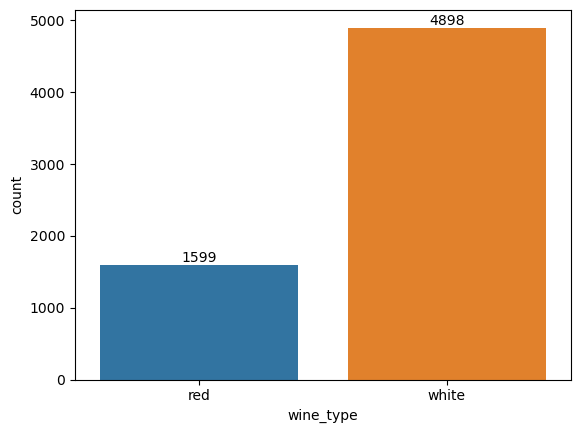

In [12]:
ax = sns.countplot(wine_df['wine_type'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '30'),
 Text(0, 0, '216'),
 Text(0, 0, '2138'),
 Text(0, 0, '2836'),
 Text(0, 0, '1079'),
 Text(0, 0, '193'),
 Text(0, 0, '5')]

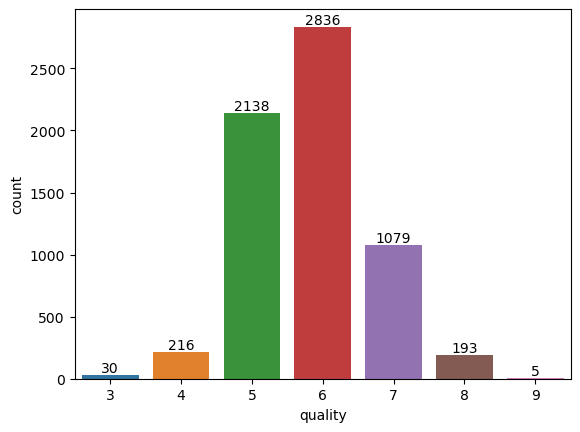

In [13]:
ax = sns.countplot(wine_df['quality'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '5220'), Text(0, 0, '1277')]

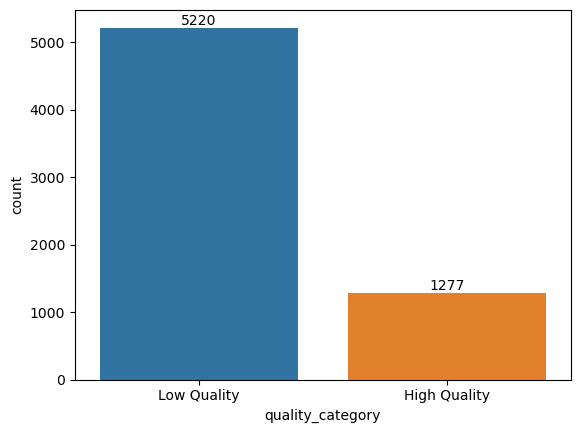

In [14]:
ax = sns.countplot(wine_df['quality_category'])
ax.bar_label(ax.containers[0])

In [15]:
# The dataset consists of outliers so we will proceed for normalization using robust scaler

<AxesSubplot:>

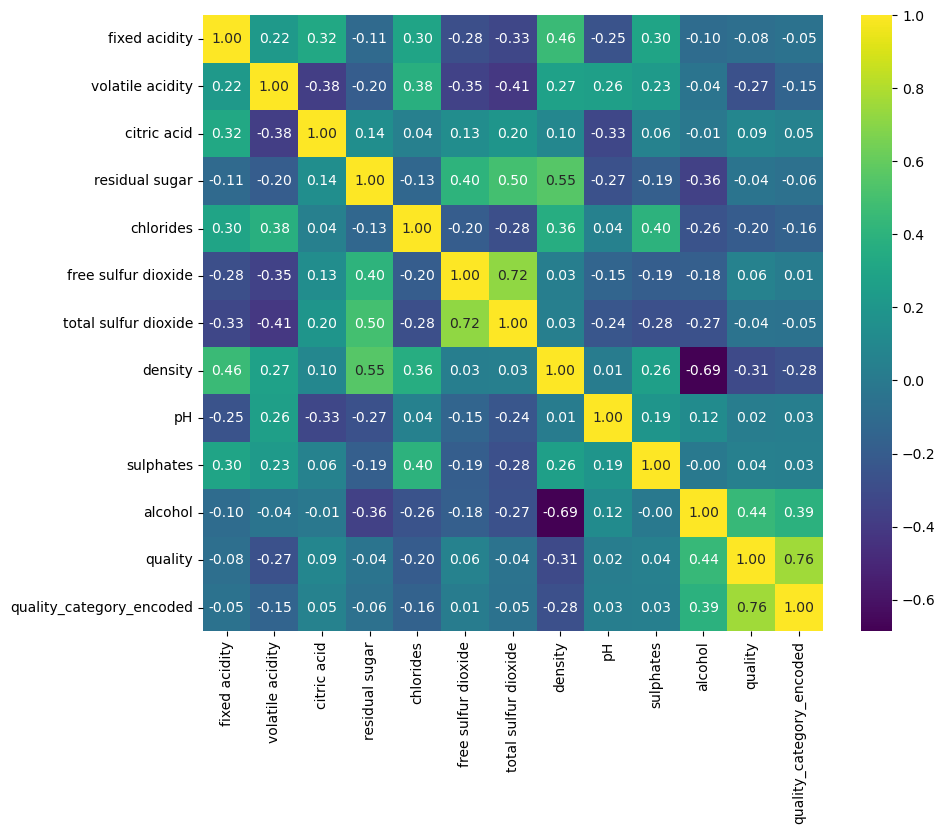

In [16]:
corr = wine_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, fmt='.2f', cmap = "viridis" , annot=True)

In [17]:
# Define features and target
X = wine_df.drop(['quality', 'quality_category', 'quality_category_encoded' ,'wine_type'], axis=1)  # Drop the target columns
y = wine_df['quality_category_encoded']  # Target variable

## Decision Tree

Decision Tree Classifier:
Accuracy: 0.8330126971912274
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      2102
           1       0.56      0.61      0.58       497

    accuracy                           0.83      2599
   macro avg       0.73      0.75      0.74      2599
weighted avg       0.84      0.83      0.84      2599

Confusion Matrix for Decision Tree:
 [[1864  238]
 [ 196  301]]


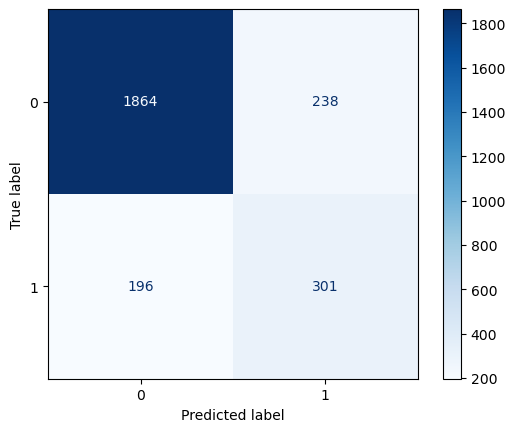

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict and evaluate Decision Tree
y_pred_tree = decision_tree.predict(X_test)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Generate and display the confusion matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:\n", conf_matrix_tree)

# Plot the confusion matrix for Decision Tree
metrics.plot_confusion_matrix(decision_tree, X_test, y_test, cmap='Blues')
plt.show()

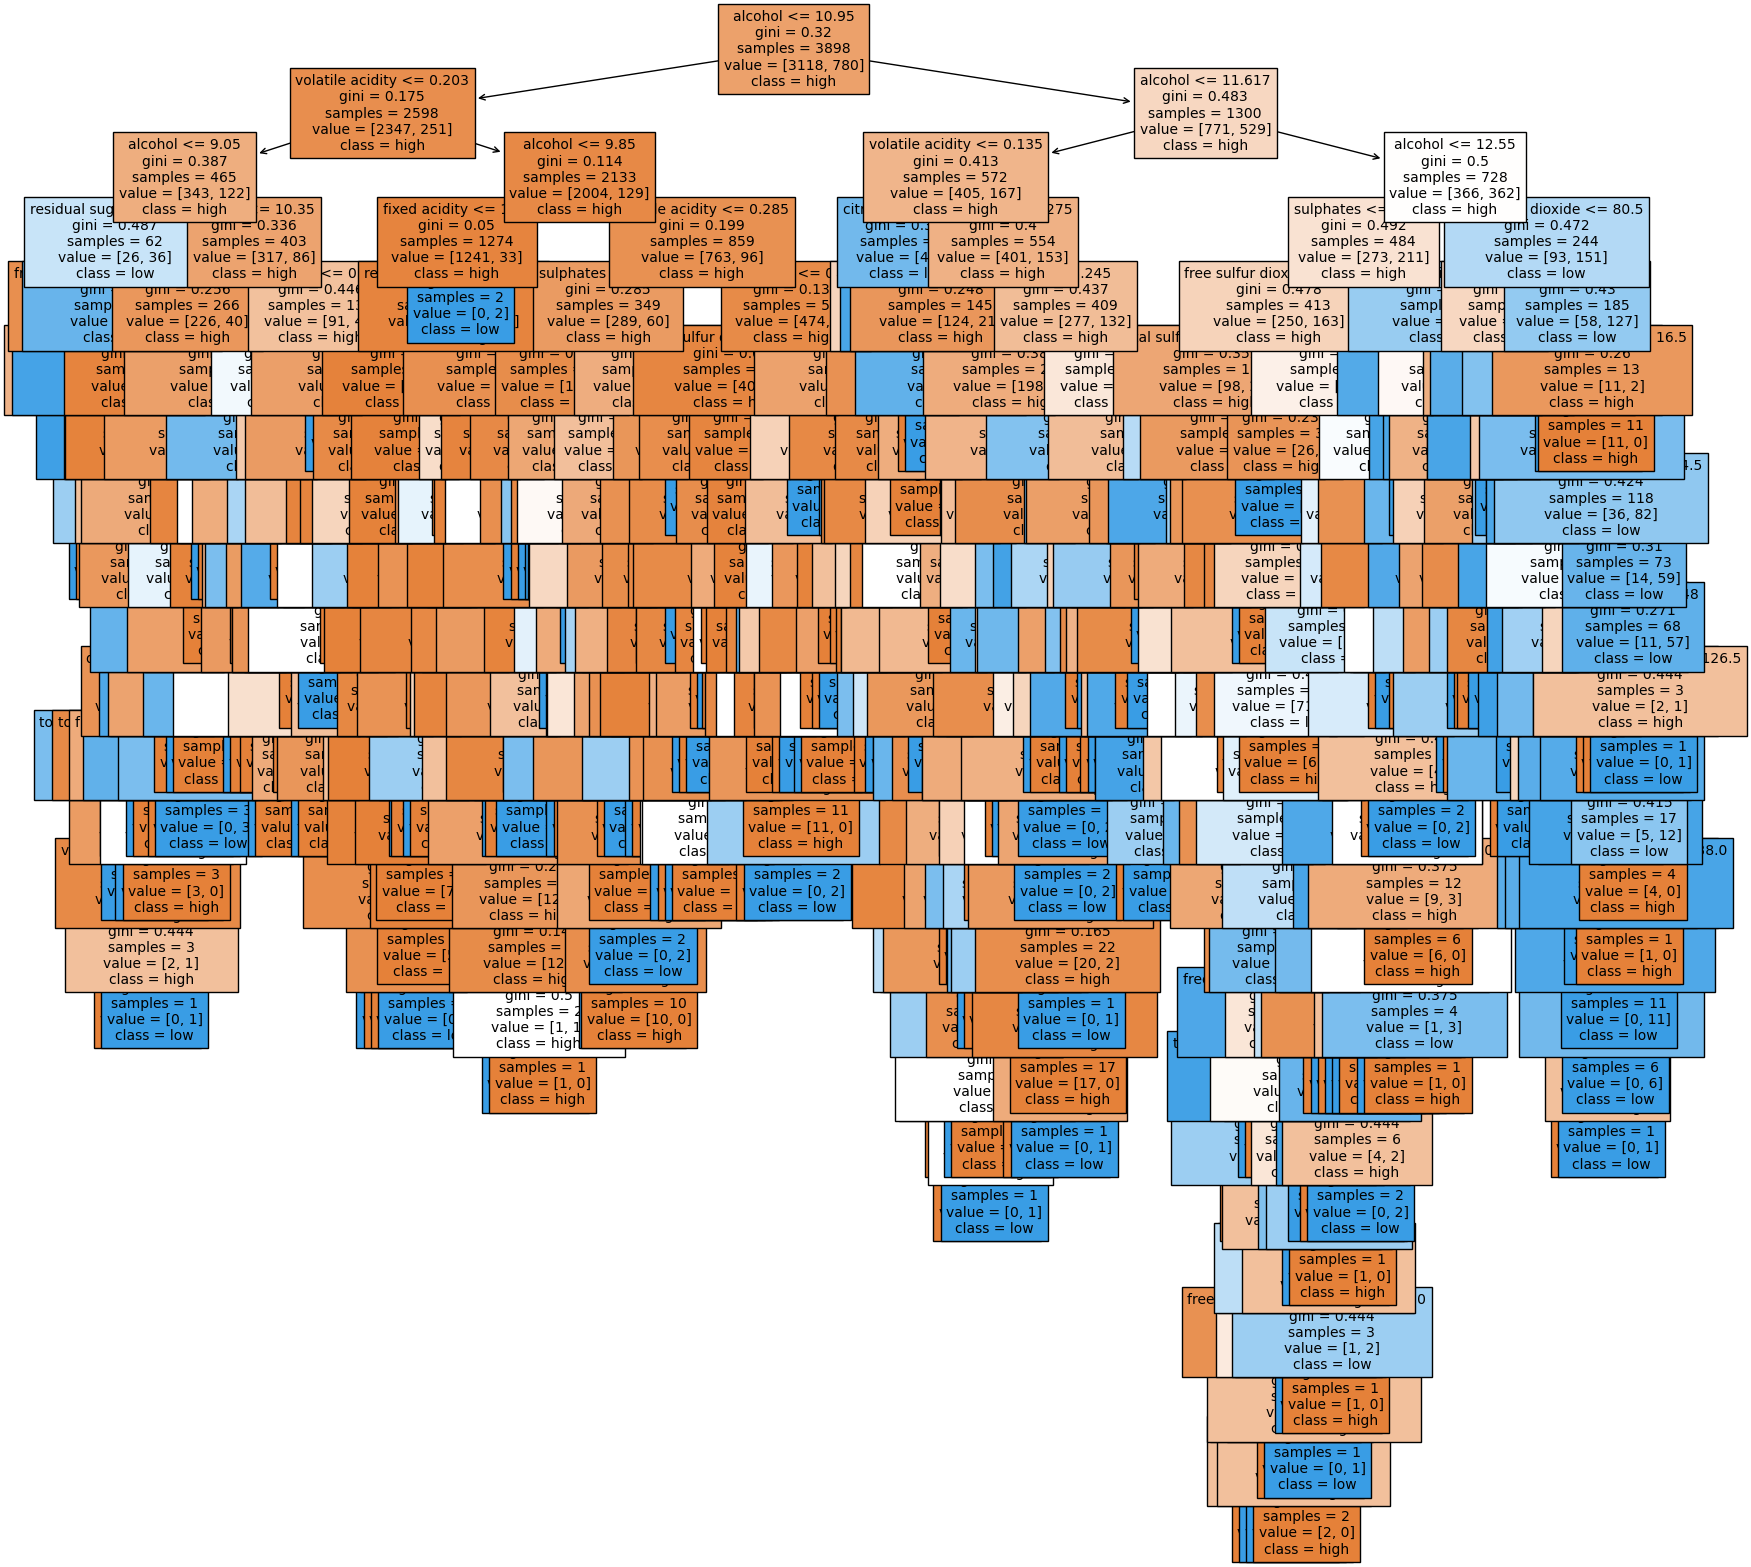

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['high', 'low'], fontsize=10)
plt.show()

In [20]:
# Split the original data into training (60%) and test (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_extra, y_test, y_extra = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Use Decision Tree on the extra sample
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_extra = dt_model.predict(X_extra)

# Evaluate the Decision Tree model on the new sample
print("Accuracy:", accuracy_score(y_extra, y_pred_extra))
print("Decision Tree Classification Report on Extra Sample:\n", classification_report(y_extra, y_pred_extra))
print("Decision Tree Confusion Matrix on Extra Sample:\n", confusion_matrix(y_extra, y_pred_extra))

Accuracy: 0.8461538461538461
Decision Tree Classification Report on Extra Sample:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       423
           1       0.58      0.61      0.60        97

    accuracy                           0.85       520
   macro avg       0.75      0.75      0.75       520
weighted avg       0.85      0.85      0.85       520

Decision Tree Confusion Matrix on Extra Sample:
 [[381  42]
 [ 38  59]]


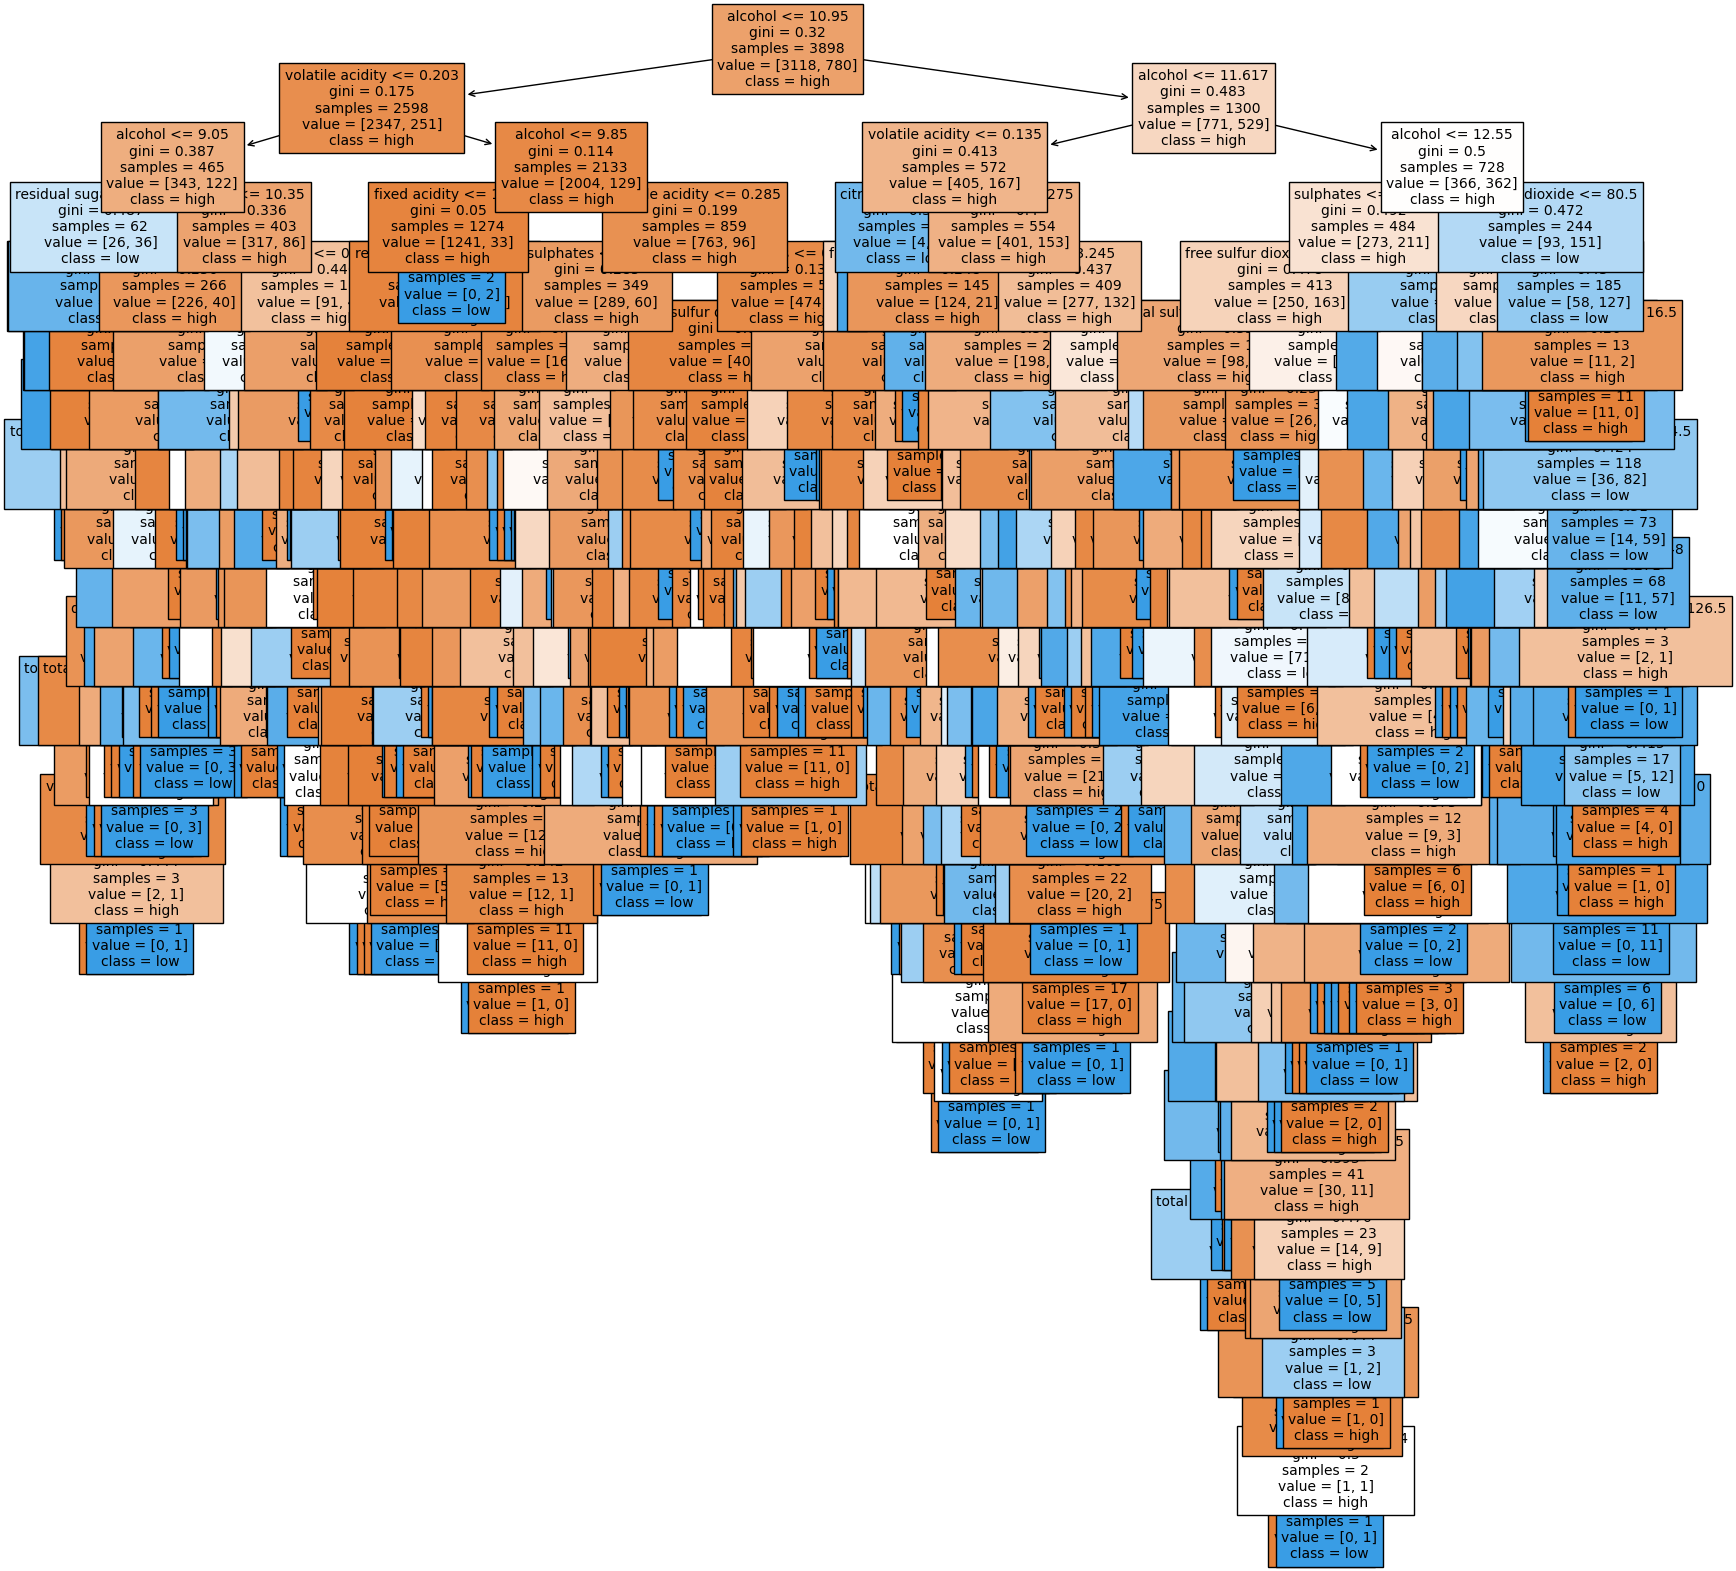

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['high', 'low'], fontsize=10)
plt.show()

## Gaussian Naïve Bayes 

Naive Bayes Classifier:
Accuracy: 0.7691419776837245
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      2102
           1       0.43      0.60      0.50       497

    accuracy                           0.77      2599
   macro avg       0.66      0.71      0.67      2599
weighted avg       0.81      0.77      0.78      2599

Confusion Matrix for Naive Bayes:
 [[1699  403]
 [ 197  300]]


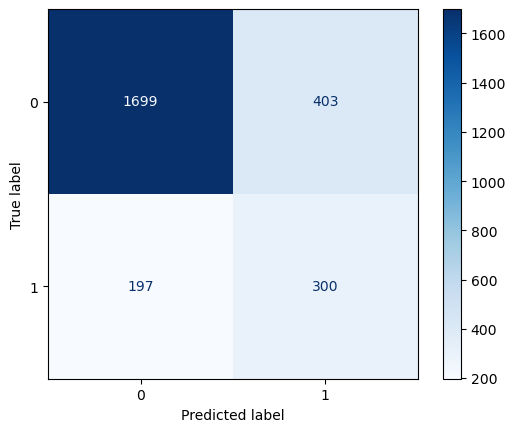

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict and evaluate Naive Bayes
y_pred_nb = naive_bayes.predict(X_test)
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Generate and display the confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)

# Plot the confusion matrix for Naive Bayes
metrics.plot_confusion_matrix(naive_bayes, X_test, y_test, cmap='Blues')
plt.show()

In [23]:
import time

# Measure time for Decision Tree
start_time = time.time()
# Train and evaluate the Decision Tree model
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
dt_time = time.time() - start_time

# Measure time for Naïve Bayes
start_time = time.time()
# Train and evaluate the Naïve Bayes model
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
nb_time = time.time() - start_time

print(f"Decision Tree Training and Testing Time: {dt_time:.4f} seconds")
print(f"Naïve Bayes Training and Testing Time: {nb_time:.4f} seconds")

Decision Tree Training and Testing Time: 0.0538 seconds
Naïve Bayes Training and Testing Time: 0.0070 seconds
